# Лабораторная работа №1
Работу выполнил Волков Вадим, студент группы Б01-007.  
Оригинал кода можно найти на [`GitHub`](https://github.com/Volkov-Vad1m/ComputationalMath/blob/master/lab1/src/main.py)  
## Используемые функции
$$sin(x^2)$$
$$cos(sin(x))$$
$$exp(sin(cos(x)))$$
$$ln(x+3)$$
$$(x+3)^{0.5}$$ 
## Используемые методы  
$$\frac{f(x+h) - f(x)}{h}$$
$$\frac{f(x) - f(x-h)}{h}$$
$$\frac{f(x+h) - f(x-h)}{2h}$$
$$\frac{4}{3}\frac{f(x+h) - f(x-h)}{2h} - \frac{1}{3}\frac{f(x+2h) - f(x-2h)}{4h}$$
$$\frac{3}{2}\frac{f(x+h) - f(x-h)}{2h} - \frac{3}{5}\frac{f(x+2h) - f(x-2h)}{4h} + \frac{1}{10}\frac{f(x+3h) - f(x-3h)}{6h}$$
## Код программы 
Импорты:

In [1]:
from cProfile import label
from symbol import func_type
from time import pthread_getcpuclockid
import numpy as np
from matplotlib import pyplot as plt

Объявляем класс Graph. В конструктор класса передается размер, масштаб, имя.  
Метод __add_graph()__ добавляет набор точек на график.
Метод __draw()__ отрисовывает график. 

In [2]:
class Graph:
    graph = 0

    def __init__(self, x_size, y_size, x_scale, y_scale, name = ""):
        self.graph = plt.figure(figsize=[x_size, y_size]) #size
        ax = self.graph.add_subplot(111) # magic
        ax.set_xscale(x_scale) 
        ax.set_yscale(y_scale)
        plt.title(name)

    def add_graph(self, x_data, y_data, x_name = "x", y_name = "y", color = "blue", legend = ''):
        plt.scatter(x_data, y_data, c = color)
        plt.plot(x_data, y_data, color, label = legend)
        plt.legend()
        plt.xlabel(x_name)
        plt.ylabel(y_name)
        plt.grid()  

    def draw(self):
        plt.show()

Инициализируем массивы функций.

In [3]:
funcs_name = []
funcs_name.append("sin(x^2)")
funcs_name.append("cos(sin(x))")
funcs_name.append("exp(sin(cos)x)))")
funcs_name.append("ln(x+3)")
funcs_name.append("(x+3)^0,5")

funcs = []
funcs.append(lambda arg: np.sin(np.power(arg, 2)))
funcs.append(lambda arg: np.cos(np.sin(arg)))
funcs.append(lambda arg: np.exp(np.sin(np.cos(arg))))
funcs.append(lambda arg: np.log(arg + 3))
funcs.append(lambda arg: np.sqrt(arg + 3))

funcs_ders = []
funcs_ders.append(lambda arg: 2 * arg * np.cos(np.power(arg, 2)))
funcs_ders.append(lambda arg: -(np.cos(arg) * np.sin(np.sin(arg))))
funcs_ders.append(lambda arg: -(np.exp(np.sin(np.cos(arg))) * np.cos(np.cos(arg)) * np.sin(arg)))
funcs_ders.append(lambda arg: 1 / (arg + 3))
funcs_ders.append(lambda arg: 1 / (2 * np.sqrt(arg + 3)))

methods = []
methods.append(lambda func, arg, h: (func(arg + h) - func(arg))/h )

methods.append(lambda func, arg, h: (func(arg) - func(arg -h)) / h)

methods.append(lambda func, arg, h: (func(arg + h) - func(arg - h)) / (2 * h))

methods.append(lambda func, arg, h: \
                4 * (func(arg + h) - func(arg - h)) / (6 * h) - \
                (func(arg + 2 * h) - func(arg - 2 * h)) / (12 * h))

methods.append(lambda func, arg, h: \
                3 * (func(arg + h) - func(arg - h)) / (4 * h) - 
                3 * (func(arg + 2 * h) - func(arg - 2 * h)) / (20 * h) + \
                (func(arg + 3 * h) - func(arg - 3 * h)) / (60 * h))

Главная часть. Подсчет и построение графиков. 

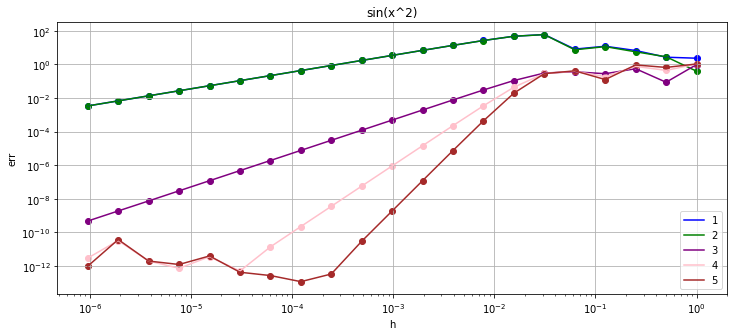

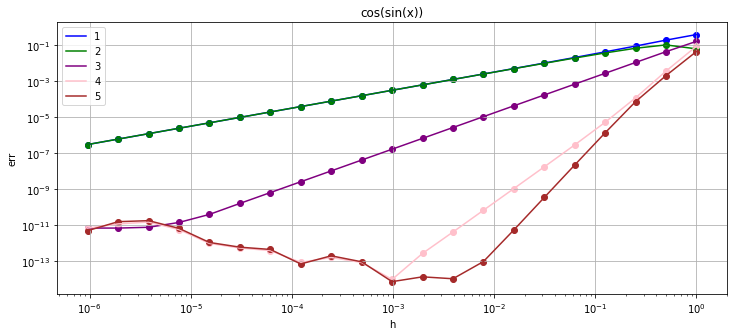

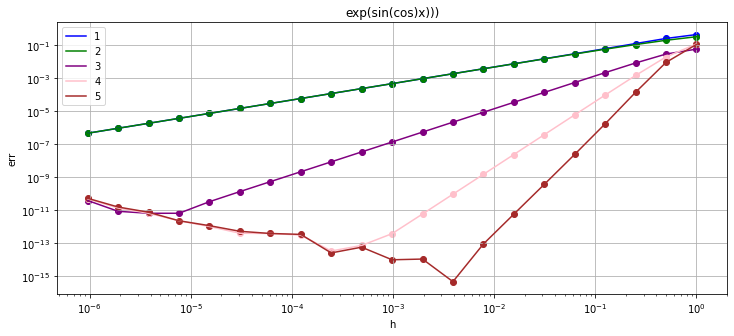

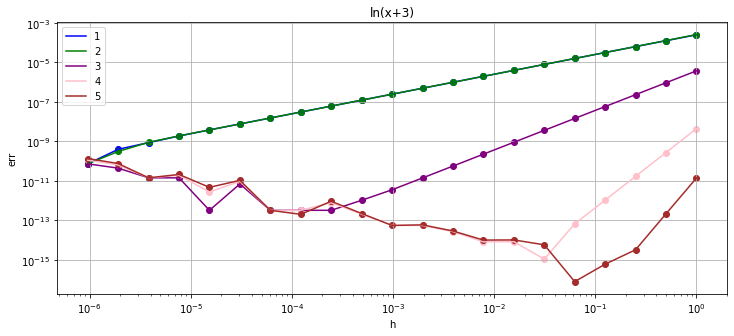

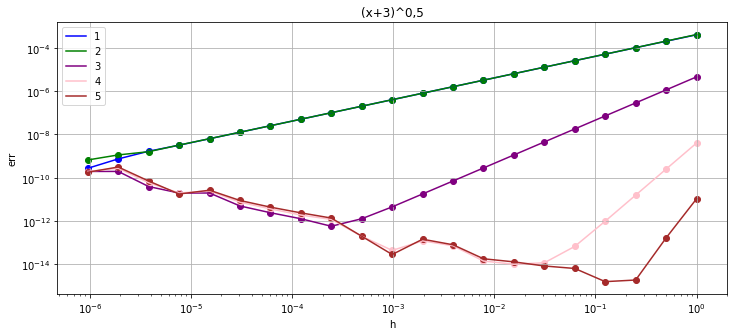

In [4]:
point = 42
h_arr = np.array([2/np.power(2, n) for n in range (1, 22)])

for i in range (0, len(funcs)):
    color = ["brown", "pink", "purple", "green", "blue"]
    graph = Graph(12, 5, 'log', 'log', funcs_name[i])
    for j in range (0, len(methods)):
        errors = np.fabs(funcs_ders[i](point) - methods[j](funcs[i], point, h_arr))
        graph.add_graph(h_arr, errors, "h", "err", color.pop(), j+1)
    graph.draw()

## Итог
Точность исследумых численных методов дифференцирования отличается.  
Ранжирование в порядке убывания точности: 5, 4, 3, 2, 1.